# Análisis exploratorio de datos

In [1]:
# Importar las bibliotecas necesarias para el proyecto
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import streamlit as st
from IPython.display import display

In [2]:
# Leer los datos necesarios para el proyecto
data = pd.read_csv('vehicles_us.csv')

In [3]:
# Imprimir información y una muestra de los datos.
data.info()
display(data.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
43060,16800,2011.0,ford f-150,excellent,8.0,gas,53035.0,automatic,pickup,black,NaN,2018-10-03,14
2673,9900,2007.0,jeep wrangler,excellent,NaN,gas,104000.0,automatic,SUV,white,1.0,2018-06-01,43
8674,5500,NaN,subaru impreza,excellent,4.0,gas,132000.0,manual,sedan,NaN,1.0,2018-08-30,23
16453,7500,NaN,ford f-150,good,8.0,gas,2004.0,automatic,pickup,NaN,1.0,2018-08-10,11
24076,6995,2016.0,chevrolet cruze,good,4.0,gas,111716.0,automatic,sedan,silver,NaN,2018-10-20,24


## Verificar problemas en los datos.

In [4]:
data = data.drop_duplicates()

In [5]:
data['is_4wd'] = data['is_4wd'].fillna(0.0)
data['is_4wd'] = data['is_4wd'].astype('int')

In [6]:
data['paint_color'] = data['paint_color'].fillna('unknown')
data['paint_color'] = data['paint_color'].astype('string')

In [7]:
display(data['model'].unique())
data['model'] = data['model'].astype('string')
data['condition'] = data['condition'].astype('string')
data['fuel'] = data['fuel'].astype('string')
data['transmission'] = data['transmission'].astype('string')
data['type'] = data['type'].astype('string')
data['date_posted'] = pd.to_datetime(data['date_posted'])

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [8]:
data.info()
display(data.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  string        
 3   condition     51525 non-null  string        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  string        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  string        
 8   type          51525 non-null  string        
 9   paint_color   51525 non-null  string        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), string(6)
memory usage: 5.1 MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
20442,19995,2013.0,gmc sierra 2500hd,good,8.0,other,119336.0,automatic,pickup,red,1,2018-07-30,29
44236,4950,NaN,honda accord,good,4.0,gas,153861.0,automatic,sedan,black,0,2018-12-26,33
51171,11500,2005.0,chevrolet silverado 2500hd,good,8.0,gas,NaN,automatic,truck,grey,1,2019-02-27,10
44085,25499,2007.0,ram 2500,like new,6.0,diesel,108900.0,automatic,truck,silver,1,2018-12-14,15
24530,4800,2010.0,toyota camry le,good,4.0,gas,140143.0,automatic,sedan,red,0,2019-02-02,13


## Análisis exploratorio de datos.

In [9]:

fig = go.Figure(data=[go.Histogram(x=data['odometer'])])
fig.update_layout(title_text='Distribución del Odómetro')
fig.show()

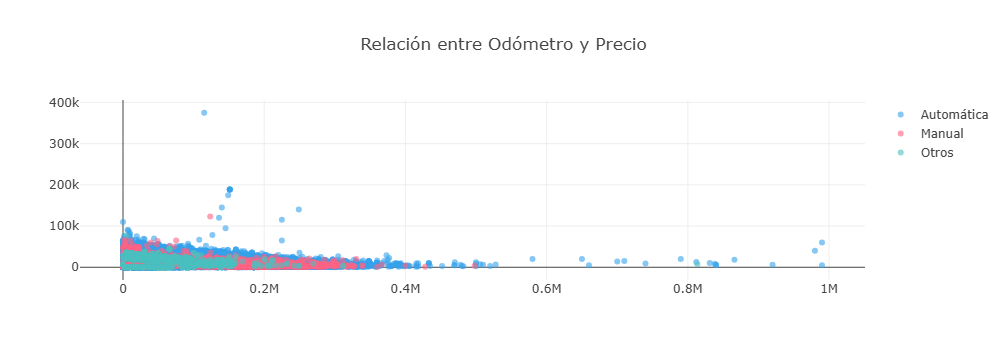

In [31]:
#
fig = go.Figure()
fig.add_trace(go.Scatter(x=data[data['transmission']=='automatic']['odometer'], y=data[data['transmission']=='automatic']['price'], mode='markers',name='Automática',line=dict(color='rgba(54, 162, 235, 0.6)')))
fig.add_trace(go.Scatter(x=data[data['transmission']=='manual']['odometer'], y=data[data['transmission']=='manual']['price'], mode='markers',name='Manual',line=dict(color='rgba(255, 99, 132, 0.6)')))
fig.add_trace(go.Scatter(x=data[data['transmission']=='other']['odometer'], y=data[data['transmission']=='other']['price'], mode='markers',name='Otros',line=dict(color='rgba(75, 192, 192, 0.6)')))
fig.update_layout(title_text='Relación entre Odómetro y Precio')
fig.show()